In [1]:
import os
from sys import path
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.randomize_f as myrand
import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import subprocess as sbp
import myfuncions.graphs_f as gf

coords = cs.cubeShell(14,2.775,'fcc')
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos, eleList = tools.spherical_cut(atpos, eleList, 25)
tools.show_percent(atpos, eleList)


name1 = 'p1.xyz'
name2 = 'p2.xyz'
name3 = 'p3.xyz'

Corta esfericamente al atpos
atomos totales : 4321
Pt : 100.0 %, 4321


## Prueba 1: 5% de vacancias en la superficie

In [9]:
name1 = 'p1.xyz'
atpos1 = myrand.eliminar_at(atpos, 0.05)
atpos1, eleList1, mode1 = myrand.cambiar_elementos_prob(atpos1,{'Pt':0.28, 'Pd':0.45, 'Co':0.27})
tools.show_percent(atpos1, eleList1)


Elimina aleatoriament el 0.05% de atpos
Cambia elementos prob a atpos
atomos totales : 4121
Pt : 27.808784275661246 %, 1146
Pd : 44.91628245571463 %, 1851
Co : 27.27493326862412 %, 1124


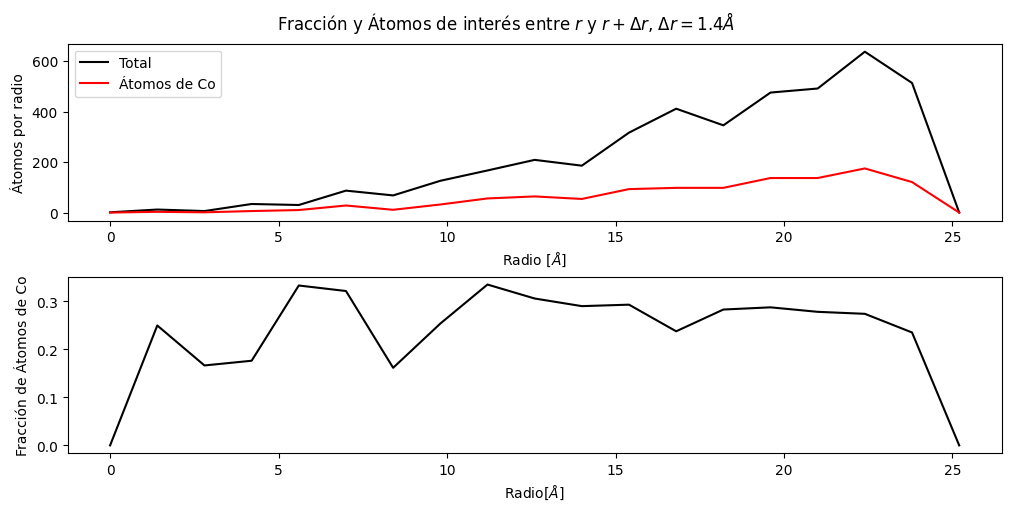

In [10]:
try: os.remove(name1)
except: pass

tools.wXYZ(atpos1, name1)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name1])

gf.plot_dump_f_y_atpr(atpos1,'Co',1.4)

In [11]:
from myfuncions.lammpin_f import wlammpin
wlammpin(atpos1,eleList1,name1)

p1.ini


In [12]:
#import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name1[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name1[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
#time.sleep(160)

0

In [13]:
datpos, deleList = tools.leer_xyz(f'{name1[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name1[:-4]}_d2.xyz')

import PDF.runner as pdf
pdf.run_pdf(f'{name1[:-4]}_d2.xyz', dir_actual, 2600,0.02)

Cambia etiquetas a "atpos"
jala
atomos totales : 4121
Pt : 27.808784275661246 %, 1146
Pd : 44.91628245571463 %, 1851
Co : 27.27493326862412 %, 1124
c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\31_de_mayo\pruebas_vac

 -0.546720028      -7.25262022      -22.1884003              78   204882.000    
  -3.90728998      -3.89478993      -22.8859005              46   204882.000    
   2.02099998E-02  -3.80604005      -22.8815994              46   204882.000    
        4121  atomos      8489260  pares 
 Rango de distancias    2.23080707     -   50.1140404    
 Distancias promedio    24.8590584    
 Factor de normalizacion    419103.656    



## Prueba 2: 10% de vacancias en la superficie

In [19]:
name2 = 'p2.xyz'
atpos2 = myrand.eliminar_at(atpos, 0.1)
atpos2, eleList2, mode2 = myrand.cambiar_elementos_prob(atpos2,{'Pt':0.28, 'Pd':0.45, 'Co':0.27})
tools.show_percent(atpos2, eleList2)

Elimina aleatoriament el 0.1% de atpos
Cambia elementos prob a atpos
atomos totales : 3894
Co : 26.784797123780173 %, 1043
Pd : 45.09501797637391 %, 1756
Pt : 28.120184899845917 %, 1095


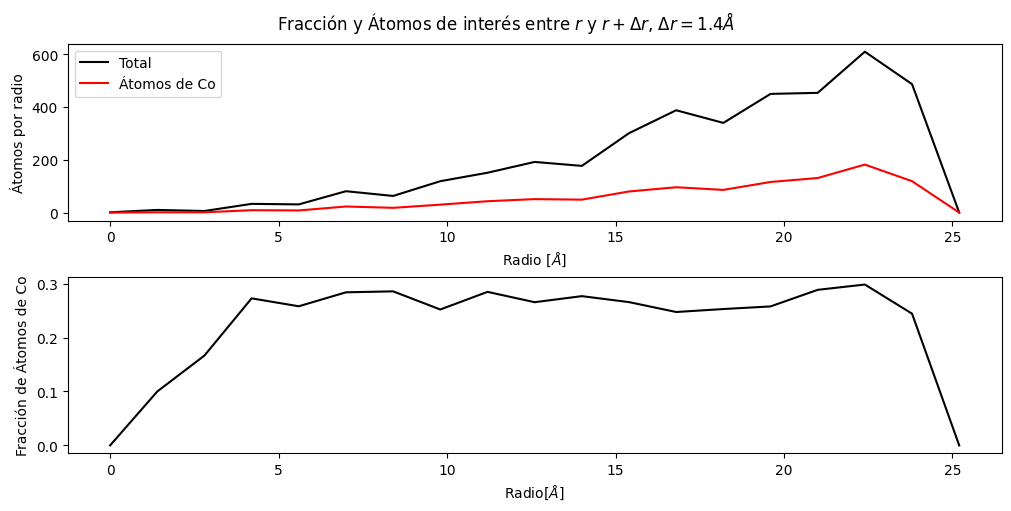

In [20]:
try: os.remove(name2)
except: pass

tools.wXYZ(atpos2, name2)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name2])

gf.plot_dump_f_y_atpr(atpos2,'Co',1.4)

In [21]:
from myfuncions.lammpin_f import wlammpin
wlammpin(atpos2,eleList2,name2)

p2.ini


In [22]:
#import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name2[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name2[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
#time.sleep(160)

0

In [23]:
datpos, deleList = tools.leer_xyz(f'{name2[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name2[:-4]}_d2.xyz')

import PDF.runner as pdf
pdf.run_pdf(f'{name2[:-4]}_d2.xyz', dir_actual, 2600,0.02)

Cambia etiquetas a "atpos"
jala
atomos totales : 3894
Pt : 28.120184899845917 %, 1095
Pd : 45.09501797637391 %, 1756
Co : 26.784797123780173 %, 1043
c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\31_de_mayo\pruebas_vac

  -3.50299001      -3.67874002      -22.3705006              27   194347.000    
   6.28800020E-02  -3.64208007      -22.3757000              27   194347.000    
   3.52257991      -3.50290990      -23.0813007              46   194347.000    
        3894  atomos      7579671  pares 
 Rango de distancias    2.19720745     -   48.7555618    
 Distancias promedio    24.7043571    
 Factor de normalizacion    376738.281    



## Prueba 3: 15% de vacancias en la superficie

In [34]:
name3 = 'p3.xyz'
atpos3 = myrand.eliminar_at(atpos, 0.15)
atpos3, eleList3, mode3 = myrand.cambiar_elementos_prob(atpos3,{'Pt':0.28, 'Pd':0.45, 'Co':0.27})
tools.show_percent(atpos3, eleList3)


Elimina aleatoriament el 0.15% de atpos
Cambia elementos prob a atpos
atomos totales : 3660
Pt : 28.306010928961747 %, 1036
Co : 26.994535519125684 %, 988
Pd : 44.69945355191257 %, 1636


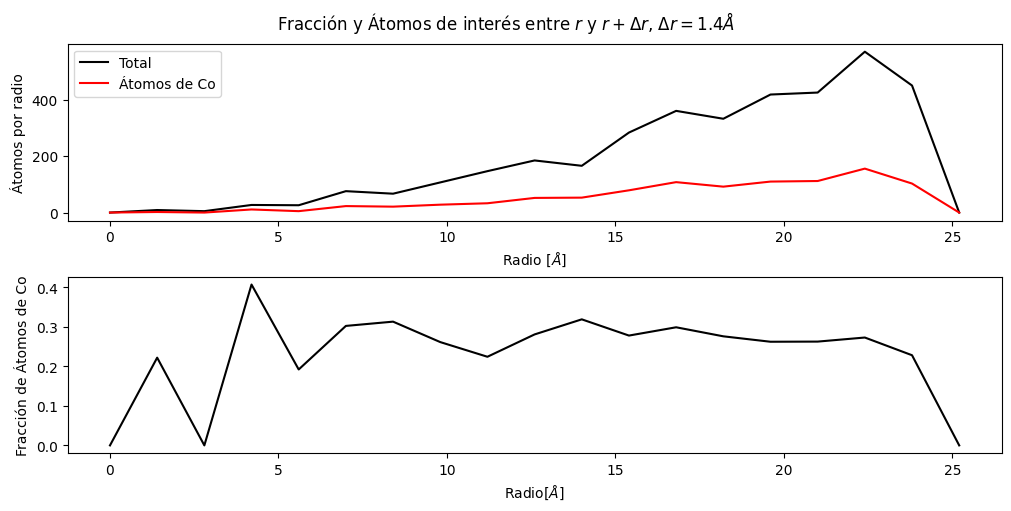

In [35]:
try: os.remove(name3)
except: pass

tools.wXYZ(atpos3, name3)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name3])

gf.plot_dump_f_y_atpr(atpos3,'Co',1.4)

In [36]:

wlammpin(atpos3,eleList3,name3)

p3.ini


In [37]:
import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name3[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name3[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
time.sleep(160)

In [38]:
datpos, deleList = tools.leer_xyz(f'{name3[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name3[:-4]}_d2.xyz')

import PDF.runner as pdf
pdf.run_pdf(f'{name3[:-4]}_d2.xyz', dir_actual, 2600,0.02)

Cambia etiquetas a "atpos"
jala
atomos totales : 3660
Pt : 28.306010928961747 %, 1036
Pd : 44.69945355191257 %, 1636
Co : 26.994535519125684 %, 988
c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\31_de_mayo\pruebas_vac

  -6.30199984E-02  -7.58763981      -21.7980003              78   182740.000    
  -3.88735008      -4.14319992      -22.4171009              27   182740.000    
  0.371210009      -2.84085989      -20.9288006              78   182740.000    
        3660  atomos      6695970  pares 
 Rango de distancias    2.19336057     -   48.1920738    
 Distancias promedio    24.4005852    
 Factor de normalizacion    336925.188    



# Comparación de las PDFs

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
M = pd.DataFrame()

df_exp = pd.read_csv('../../26_de_abril/Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index += 1
M['exp'] = rest_df_exp

dx = 0.02

#M.index = M0['#r(A)']
M300 = pd.read_csv(f'{name1[:-4]}_d2.txt', sep='\s+')
M400 = pd.read_csv(f'{name2[:-4]}_d2.txt', sep='\s+')
M500 = pd.read_csv(f'{name3[:-4]}_d2.txt', sep='\s+')

M['5'] = M300['G(r)']
M['10'] = M400['G(r)']
M['15'] = M500['G(r)']

M.index = (M.index + 1)*dx

temps = [5,10,15]

for i in temps:
    a = M[M[f'{i}']== max(M[f'{i}'])].index[0]
    b = 0.29 #### Al parecer este es el originario de todo lo que yo estaba haciendo
    c = b/(float(M[f'{i}'][a]))
    M[f'{i}'] *= c
    rest = M['exp'] - M[f'{i}']
    error = np.sum(rest**2)
    error_p = np.sqrt(error/2600)
    print(f'Para {i} % el error es {error},y el error porcentual es {error_p}')




fig = px.line(M, template='simple_white', title='Pair Distribution Functions of 9 Models',
    width=1000, height=600)
fig.update_layout(
    font_family="serif",
    title_font_family="serif")
fig.update_xaxes(title_text='G(r)')
fig.update_yaxes(title_text='r [A]')
fig.show()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\guill\AppData\Local\Temp\ipykernel_25412\3850946145.py:6: SyntaxWarning: invalid escape sequence '\s'
  df_exp = pd.read_csv('../../26_de_abril/Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
C:\Users\guill\AppData\Local\Temp\ipykernel_25412\3850946145.py:16: SyntaxWarning: invalid escape sequence '\s'
  M300 = pd.read_csv(f'{name1[:-4]}_d2.txt', sep='\s+')
C:\Users\guill\AppData\Local\Temp\ipykernel_25412\3850946145.py:17: SyntaxWarning: invalid escape sequence '\s'
  M400 = pd.read_csv(f'{name2[:-4]}_d2.txt', sep='\s+')
C:\Users\guill\AppData\Local\Temp\ipy

Para 5 % el error es 3.157258356565074,y el error porcentual es 0.034847240021849836
Para 10 % el error es 4.222638369611372,y el error porcentual es 0.04030002085135637
Para 15 % el error es 4.518238047962993,y el error porcentual es 0.04168673487575096


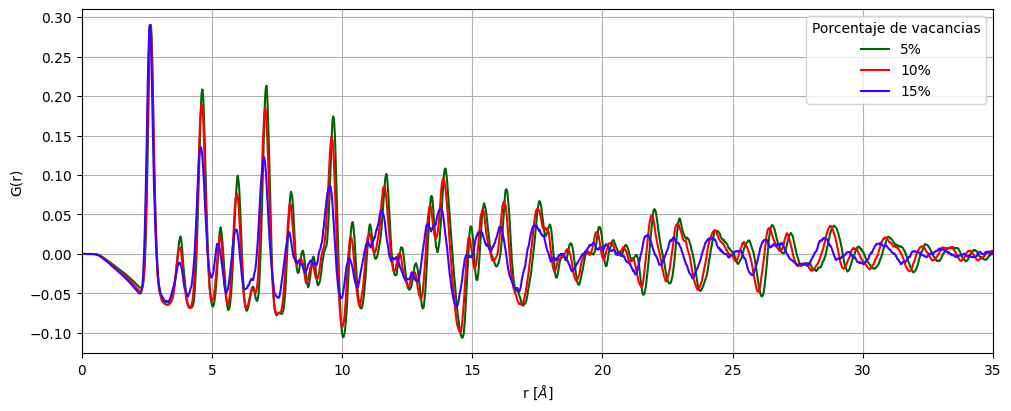

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4), layout='constrained')

#ax.plot(M.index,M['exp'], label='Experimental', color='black')
ax.plot(M.index, M['5'], label='5%', color='darkgreen')
ax.plot(M.index, M['10'], label='10%', color='red')
ax.plot(M.index, M['15'], label='15%', color = '#3F00FF')

ax.set_xlabel('r [$\\AA$]')
ax.set_xlim([0,35])
ax.set_ylabel('G(r)')

ax.legend(loc='upper right', title='Porcentaje de vacancias')
ax.grid()
plt.rc('font', size='12')
plt.rcParams['font.family']='serif'
plt.show()

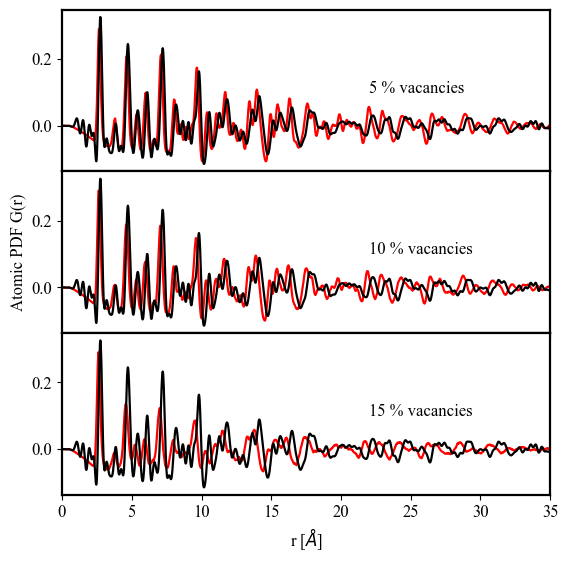

In [48]:
ancho_cm = 16
alto_cm = 16
ancho_pulg = ancho_cm / 2.54
alto_pulg = alto_cm / 2.54

fig, ax =plt.subplots(3,1, sharex=True, figsize=(ancho_pulg, alto_pulg))
fig.subplots_adjust(hspace=0)

ax[0].plot(M.index, M['5'], label = '300 K', color = 'red', lw=1.6)
ax[0].plot(M.index, M['exp'], color = 'black', lw=1.6)

ax[1].plot(M.index, M['10'], label = '500 K', color = 'red', lw=1.6)
ax[1].plot(M.index, M['exp'], color = 'black', lw=1.6)

ax[2].plot(M.index, M['15'], label = '700 K', color = 'red', lw=1.6)
ax[2].plot(M.index, M['exp'], color = 'black', lw=1.6)

ax[2].set_xlabel('r [$\\AA$]')
ax[1].set_ylabel('Atomic PDF G(r)')

for i in range(3):
    ax[i].set_xlim([0,35])
    #ax[i].label_outer()
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i].spines[axis].set(linewidth = 1.6)


ax[0].text(*[22,0.1], '5 % vacancies', rotation_mode='anchor')
ax[1].text(*[22,0.1], '10 % vacancies', rotation_mode='anchor')
ax[2].text(*[22,0.1], '15 % vacancies', rotation_mode='anchor')




plt.rc('font', size=12)

#fpath = Path(mpl.get_data_path(), "C:/Users/guill/Downloads/Fira_Sans/FiraSans-Medium.ttf")

plt.rcParams['font.serif'] = ['Times New Roman']
plt.show()